In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("../datasets/WIPRO-imputated.csv")

In [ ]:
df = pd.read_csv("../datasets/HCLTECH.csv")

In [118]:
df = pd.read_csv("../datasets/INFY.csv")

In [131]:
df = pd.read_csv("../datasets/TCS.csv")

In [132]:
df = df.set_index(df.columns[0])
df.shape

(18, 82)

In [133]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [134]:
def create_dataset(df, look_back=10):
    X, Y = [], []
    for i in range(len(df) - look_back):
        X.append(df[i:i + look_back, 0])
        Y.append(df[i + look_back, 0])
    print(len(X))
    print(len(Y))
    return np.array(X), np.array(Y)

In [135]:
look_back = 4
X, Y = create_dataset(closing_prices_scaled, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

77
77


In [136]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [137]:
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
77/77 - 4s - loss: 0.0343 - 4s/epoch - 57ms/step
Epoch 2/100
77/77 - 0s - loss: 0.0134 - 329ms/epoch - 4ms/step
Epoch 3/100
77/77 - 0s - loss: 0.0084 - 309ms/epoch - 4ms/step
Epoch 4/100
77/77 - 0s - loss: 0.0063 - 328ms/epoch - 4ms/step
Epoch 5/100
77/77 - 0s - loss: 0.0086 - 362ms/epoch - 5ms/step
Epoch 6/100
77/77 - 0s - loss: 0.0070 - 373ms/epoch - 5ms/step
Epoch 7/100
77/77 - 0s - loss: 0.0108 - 326ms/epoch - 4ms/step
Epoch 8/100
77/77 - 0s - loss: 0.0050 - 394ms/epoch - 5ms/step
Epoch 9/100
77/77 - 0s - loss: 0.0065 - 303ms/epoch - 4ms/step
Epoch 10/100
77/77 - 0s - loss: 0.0053 - 337ms/epoch - 4ms/step
Epoch 11/100
77/77 - 0s - loss: 0.0086 - 389ms/epoch - 5ms/step
Epoch 12/100
77/77 - 0s - loss: 0.0065 - 380ms/epoch - 5ms/step
Epoch 13/100
77/77 - 0s - loss: 0.0061 - 388ms/epoch - 5ms/step
Epoch 14/100
77/77 - 0s - loss: 0.0053 - 289ms/epoch - 4ms/step
Epoch 15/100
77/77 - 0s - loss: 0.0070 - 273ms/epoch - 4ms/step
Epoch 16/100
77/77 - 0s - loss: 0.0067 - 275ms/epoc

In [138]:
predicted_closing_prices_scaled = model.predict(X)

3/3 [==============================] - 2s 4ms/step


In [139]:
predicted_closing_prices = scaler.inverse_transform(predicted_closing_prices_scaled)
actual_closing_prices = scaler.inverse_transform(closing_prices_scaled[look_back:])

In [140]:
future_steps = 10
last_sequence = closing_prices_scaled[-look_back:]

In [141]:
future_predictions = []
for _ in range(future_steps):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred)[-look_back:].reshape(look_back, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 85ms/step


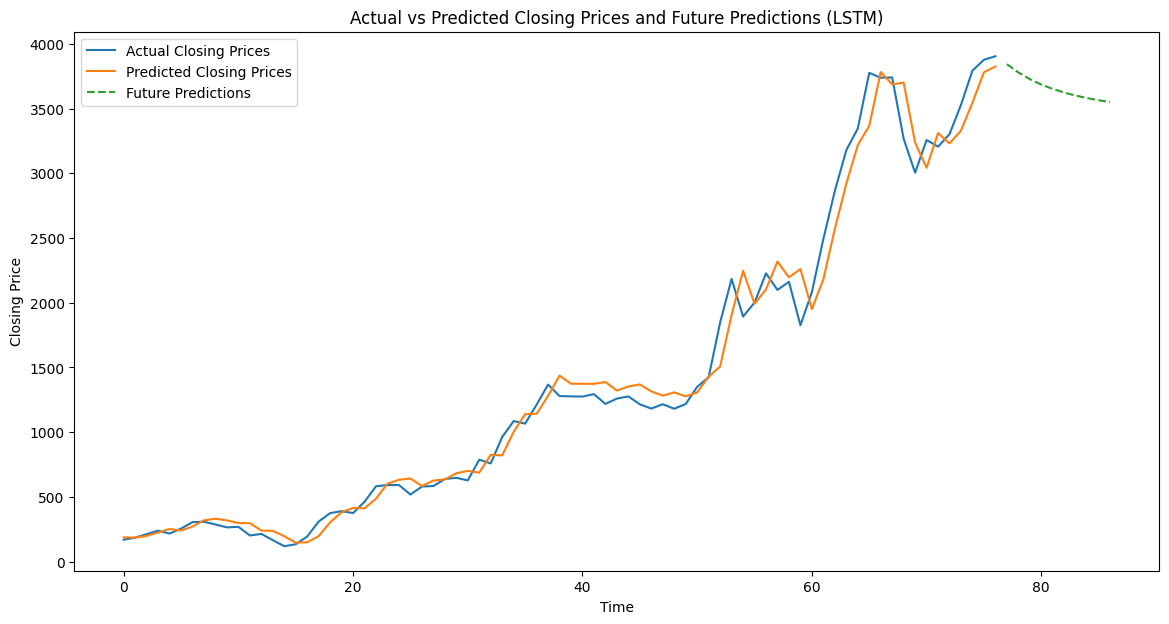

In [142]:
plt.figure(figsize=(14, 7))
plt.plot(actual_closing_prices, label='Actual Closing Prices')
plt.plot(predicted_closing_prices, label='Predicted Closing Prices')
plt.plot(np.arange(len(actual_closing_prices), len(actual_closing_prices) + future_steps), future_predictions, label='Future Predictions', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices and Future Predictions (LSTM)')
plt.legend()
plt.show()

In [143]:
mse = mean_squared_error(actual_closing_prices, predicted_closing_prices)
mae = mean_absolute_error(actual_closing_prices, predicted_closing_prices)
r2 = r2_score(actual_closing_prices, predicted_closing_prices)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 22757.48752642221
MAE: 108.55927851292994
R-squared: 0.9834666583643805
